<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Partial-fourier-reconstruction" data-toc-modified-id="Partial-fourier-reconstruction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Partial fourier reconstruction</a></span></li><li><span><a href="#K-Space" data-toc-modified-id="K-Space-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>K-Space</a></span><ul class="toc-item"><li><span><a href="#Half-of-K-space" data-toc-modified-id="Half-of-K-space-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Half of K-space</a></span></li><li><span><a href="#Partial-Fourier-at-Higher-Percentages" data-toc-modified-id="Partial-Fourier-at-Higher-Percentages-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Partial Fourier at Higher Percentages</a></span></li><li><span><a href="#K-Space-with-Hermatian-Symmetry-from-Half-of-K-space" data-toc-modified-id="K-Space-with-Hermatian-Symmetry-from-Half-of-K-space-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>K-Space with Hermatian Symmetry from Half of K-space</a></span></li><li><span><a href="#Partial-Fourier-Replaced-with-Conjugates" data-toc-modified-id="Partial-Fourier-Replaced-with-Conjugates-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Partial Fourier Replaced with Conjugates</a></span></li></ul></li></ul></div>

# Partial fourier reconstruction

In [1]:
import BrukerMRI as bruker
import pylab as pl
import plot
#Python method of extracting raw Bruker Files
import BrukerMRI as bruker

# Modules
import pandas as pd
import pydicom as dcm
import math
import numpy as np
import matplotlib.pyplot as plt
import glob
from os.path import expanduser
import os
from matplotlib import cm
import cmath

In [2]:
# copy and paste entire directory but replace "\" with "/"
# Place a "/" at the end of the line
MainDir = "C:/Users/daniala/Desktop/mri/20191210_104049_MRMD_phantom_practice_1_3/"
ExpNum = 8
Experiment = bruker.ReadExperiment(MainDir, ExpNum)
acqp = Experiment.acqp
method = Experiment.method
raw_fid = Experiment.raw_fid
k_space_gen = Experiment.GenerateKspace()
k_space = Experiment.k_data
k_sp = bruker.phase_shift(120,0,k_space)[:,:,0]

# K-Space

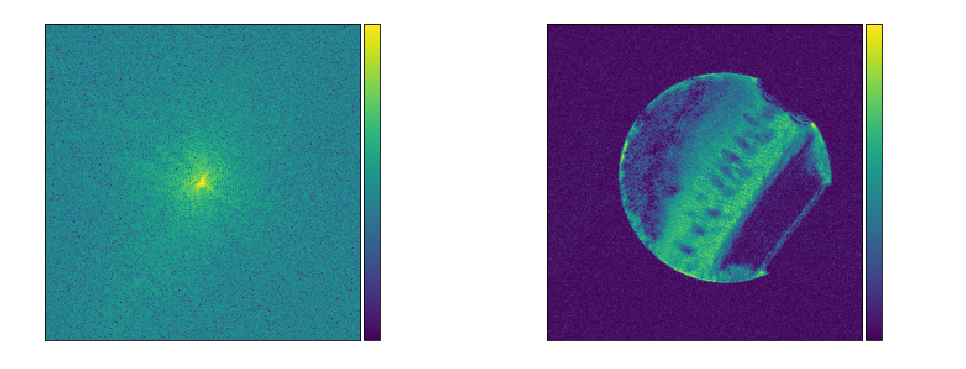

In [3]:
plots = {'Reconstructed k-Space': k_sp}

plot.comparison_k_plots(plots)

## Half of K-space

Partial Fourier imaging techniques are reconstruction methods in which data from as little as one-half of k-space is used to generate an entire MR since k-space possesses a peculiar mirrored property known as conjugate (or Hermitian) symmetry. 

In [4]:
def half_k_space(k_sp,upper_or_lower):
    k_space = k_sp.copy()
    k_sp_half = np.zeros(k_sp.shape,dtype ='complex')
    start = 0
    end = 0
    if upper_or_lower == "up":
        start = 0
        end = int(k_space.shape[0]/2)
    
    elif upper_or_lower == "lower":
        start = int(k_sp.shape[0]/2)
        end = k_space.shape[0]
    
    for i in range(start,end):
        k_sp_half[i,:] = k_space[i,:]
        
    return k_sp_half

In [5]:
plots_1 = {'Reconstructed k-Space': k_sp,
           'Upper Half of K-space Only': half_k_space(k_sp,'up'),
           'Lower Half of K-space Only': half_k_space(k_sp,'lower')
          }

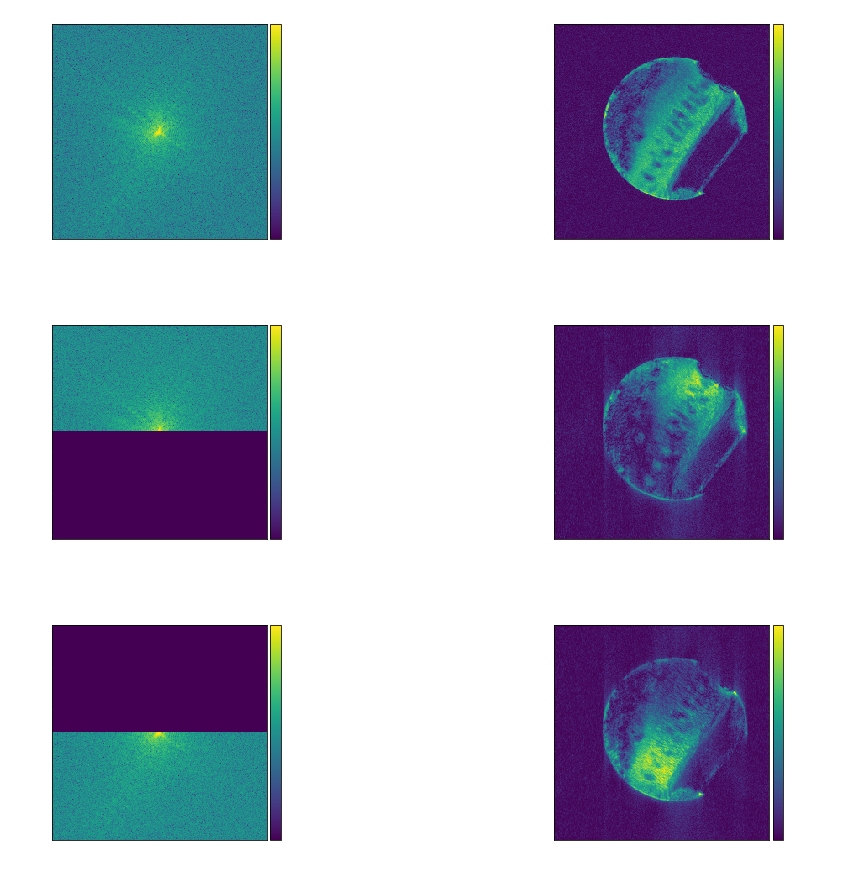

In [6]:
plot.comparison_k_plots(plots_1)

Conjugate symmetry applies to pairs of points (like P and Q) that are located diagonally from each other across the origin of k-space. If the data at P is the complex number [a+bi], the data at Q is immediately known to be P's complex conjugate, [a−bi].  Provided no phase errors occur during data collection, k-space possesses a peculiar mirrored property known as conjugate (or Hermitian) symmetry. 


In [7]:
def conjugate_sym_test(x,y):
    x_1 = x
    y_1 = y
    P = k_sp[x_1,y_1]
    Q = k_sp[255-x,255-y]
    print('The value of P in K-sapce is: '+ str(P))
    print('The value of Q in K-sapce is: '+ str(Q))
    
    p_r = int(P.real)
    q_r = int(Q.real)
    p_i = int(P.imag)
    q_i = int(Q.imag)
    if (p_r == q_r & p_i == (-1*q_i)):
         print('P and Q are Hermation Conjugate Pairs')
    else:
         print('P and Q are NOT Hermation Conjugate Pairs')
    

In [8]:
conjugate_sym_test(50,50)

The value of P in K-sapce is: (15.472448933564877-141.87883324864998j)
The value of Q in K-sapce is: (-19.427264271742786+518.1105880050279j)
P and Q are NOT Hermation Conjugate Pairs


In [36]:
conjugate_sym_test(0,0)

The value of P in K-sapce is: (15.000000000001855+42.99999999999935j)
The value of Q in K-sapce is: (-33.197356764675746-136.13939732435588j)
P and Q are NOT Hermation Conjugate Pairs


## Partial Fourier at Higher Percentages

In [10]:
def partial_fourier(k_sp,upper_or_lower,percentage):
    k_space = k_sp.copy()
    frac = percentage/100
    k_sp_frac = np.zeros(k_sp.shape,dtype ='complex')
    start = 0
    end = 0
    if upper_or_lower == "up":
        start = 0
        end = int(frac*(int(k_space.shape[0])-1))
    
    elif upper_or_lower == "lower":
        start = k_space.shape[0]-int(frac*(int(k_space.shape[0])-1))
        end = k_space.shape[0]
    
    for i in range(start,end):
        k_sp_frac[i,:] = k_space[i,:]
        
    return k_sp_frac

In [33]:
plots_3 =   {
           '60% of upper K-space Only':partial_fourier(k_sp,'up',60),
           '60% of Lower K-space Only': partial_fourier(k_sp,'lower',60),
            }
            
            
plots_3_1 = {
            '70% of upper K-space Only':partial_fourier(k_sp,'up',70),
            '70% of Lower K-space Only': partial_fourier(k_sp,'lower',70)
            }

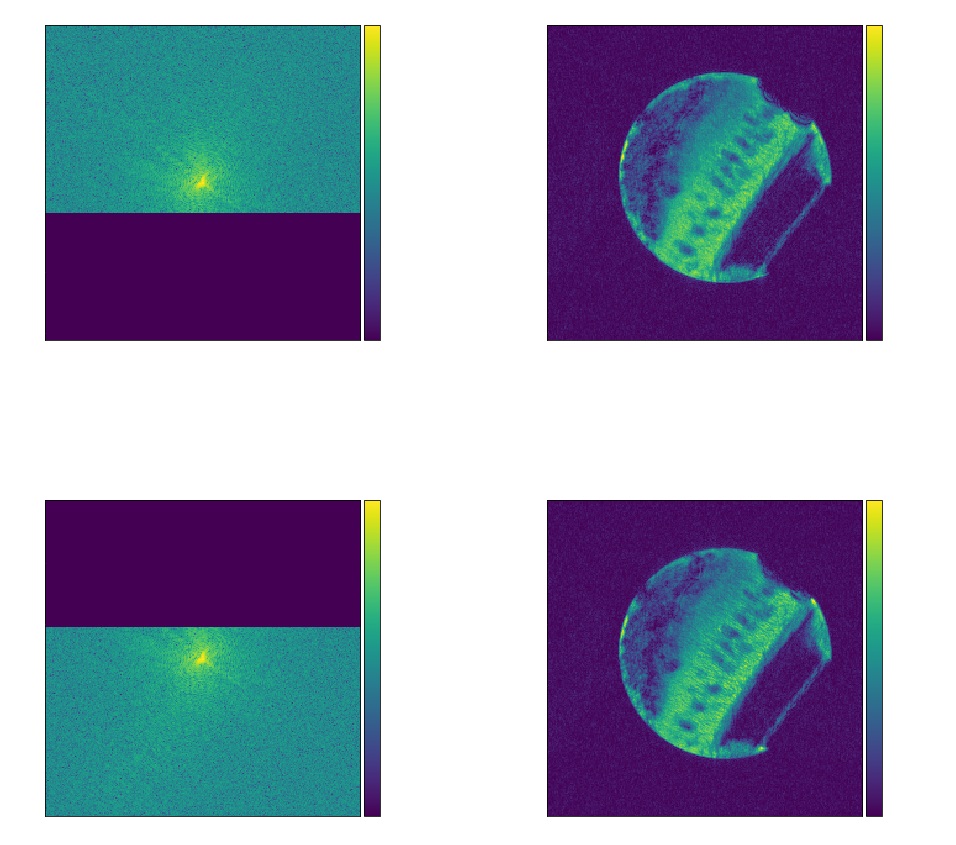

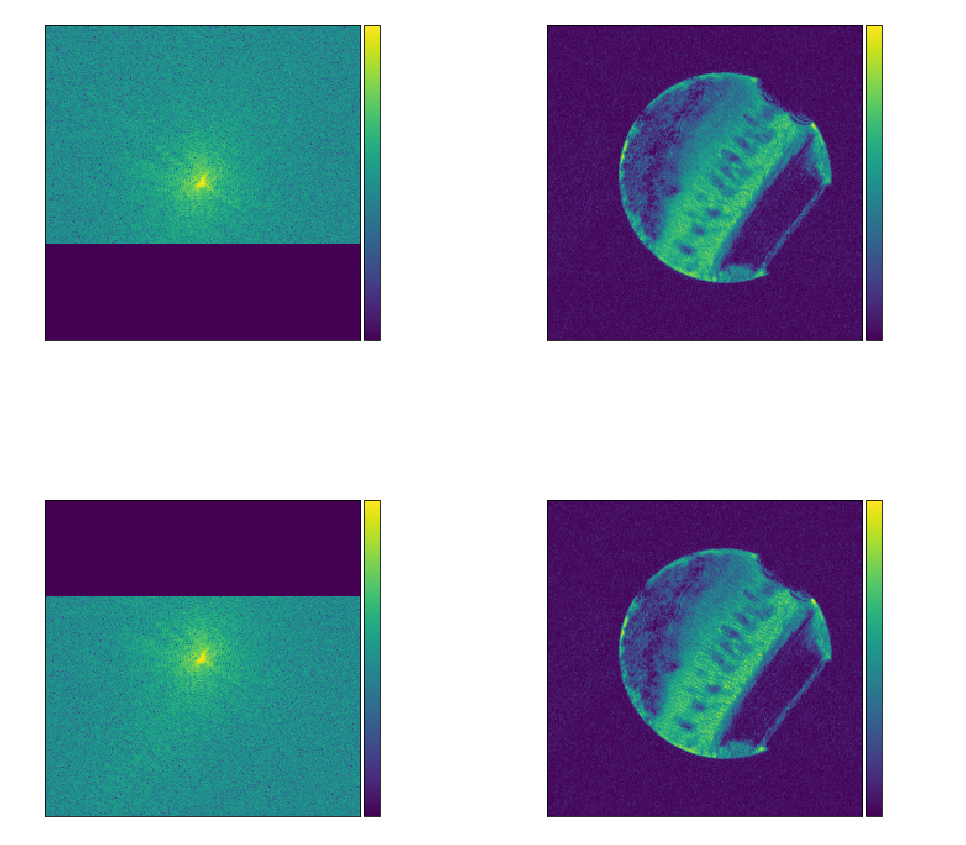

In [34]:
plot.comparison_k_plots(plots_3)
plot.comparison_k_plots(plots_3_1)

Current partial acquisitions aqcuire more than half of k-sapce to retain ther image contrasts whilst loosing image details from the periphery of k-space.

## K-Space with Hermatian Symmetry from Half of K-space

In [13]:
upper = half_k_space(k_sp,'up')

In [14]:
def hermatian_symmetry_from_half(k_sp):
    k_space = k_sp.copy()
    k_sp_half = np.zeros(k_space.shape,dtype ='complex')
    
    # top half remains unchanged
    k_sp_half[0:128,:] = k_space[0:128,:]

    # take the upper left and upper right quarters and reverse the order of the columns
    for i in range(0,127):
        for j in range(0,127):
            k_sp_half[255-i,127-j] = np.conjugate(k_space[i,128+j])
            k_sp_half[255-i,128+j] = np.conjugate(k_space[i,127-j])
    
    k_sp_half[128,127:0:-1] =  np.conjugate(k_space[127,128:255])
    k_sp_half[128,128:255] =  np.conjugate(k_space[127,127:0:-1])
    
    return k_sp_half

In [15]:
upper_symmetry = hermatian_symmetry_from_half(k_sp)

In [16]:
plots_4 = {
        'Upper Half of K-space Only': upper,
        'Conjugate of Ideal Upper Half of K-space': upper_symmetry
        #'Lower Half of K-space Only': lower,
        #'Conjugate of Lower Half of K-space': conj_lower
          }

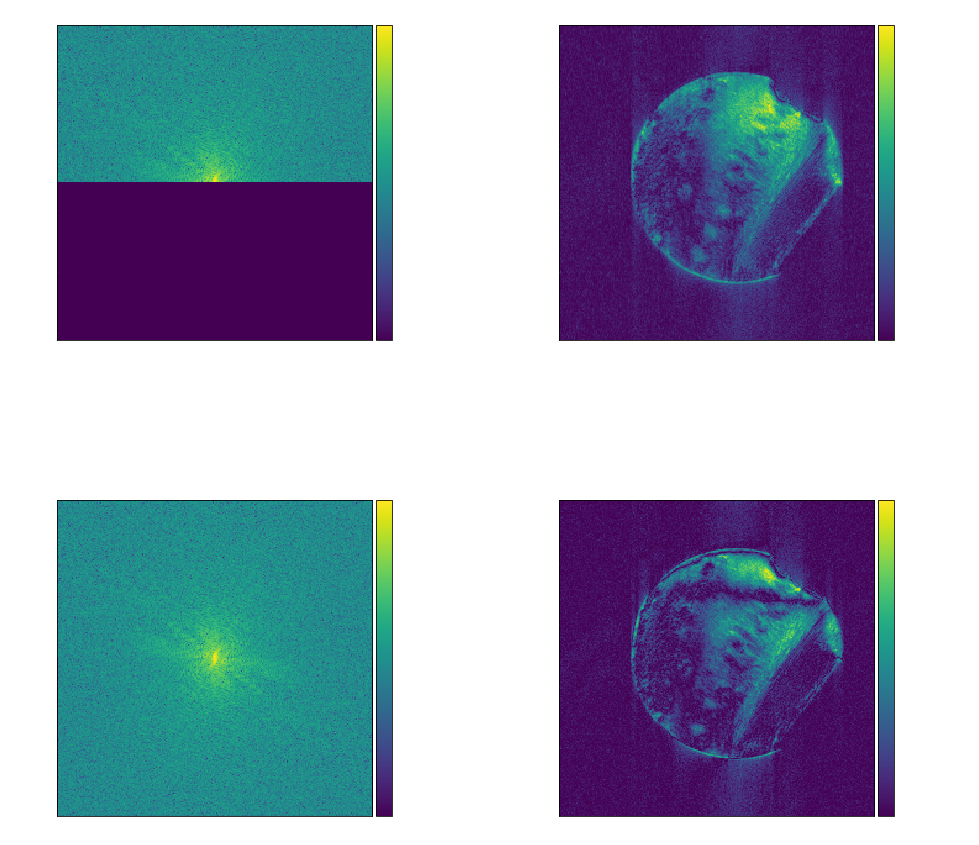

In [17]:
plot.comparison_k_plots(plots_4)

## Partial Fourier Replaced with Conjugates

In [18]:
k_sp_60 = partial_fourier(k_sp,'up',60)

In [37]:
def conjugate_corrections(k_sp,percentage):
    k_space = k_sp.copy()
    k_sp_conj = np.zeros(k_space.shape,dtype ='complex')
    # top half remains unchanged
    frac = percentage/100
    row = int(frac*(int(k_space.shape[0])))
    k_sp_conj[0:row,:] = k_space[0:row,:]
    empty_rows = (256-row)

    # extracting information from the top and obtaining conjugates
    for i in range(0,empty_rows):
        for j in range(255):
            k_sp_conj[255-i,255-j] = np.conjugate(k_space[i,j])
        '''
        for j in range(0,127):
            k_sp_conj[255-i,127-j] = np.conjugate(k_space[i,128+j])
            k_sp_conj[255-i,128+j] = np.conjugate(k_space[i,127-j])
        '''
    return k_sp_conj

In [38]:
 k_sp_conj_60 = conjugate_corrections(k_sp,60)

In [39]:
plots_5 = {
        '60% of K-space Only': k_sp_60,
        'Conjugate of remaining 40%': k_sp_conj_60
        #'Lower Half of K-space Only': lower,
        #'Conjugate of Lower Half of K-space': conj_lower
          }

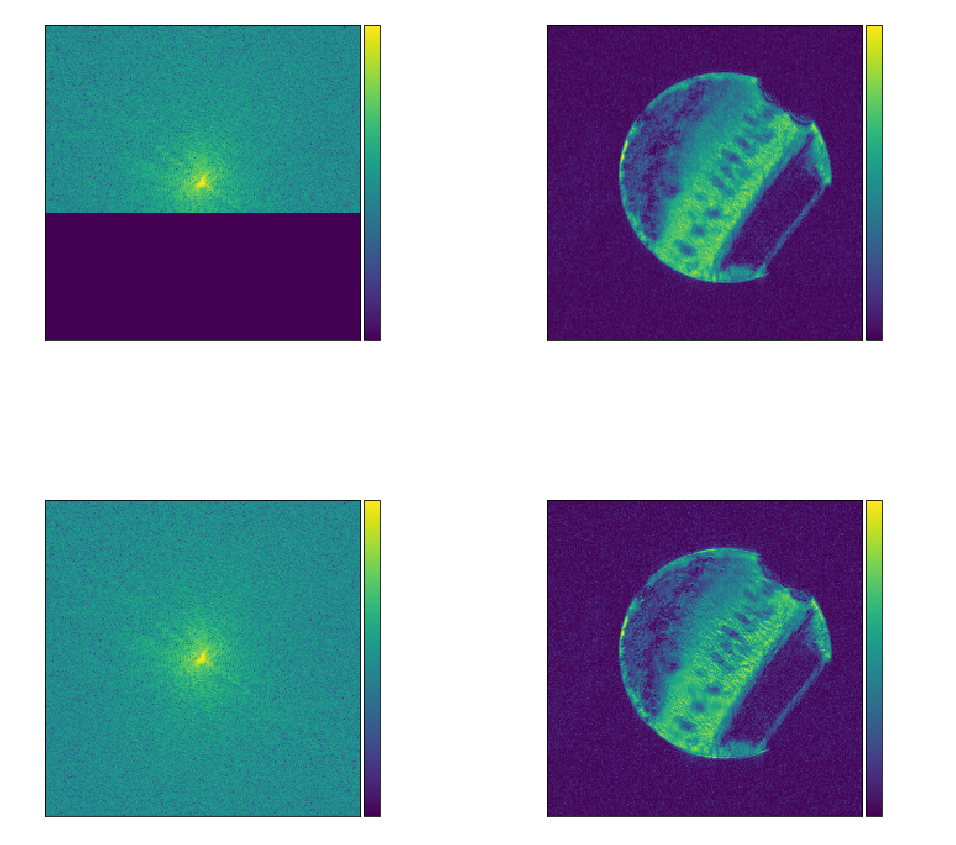

In [40]:
plot.comparison_k_plots(plots_5)

In [23]:
k_sp_55 = partial_fourier(k_sp,'up',55)
k_sp_conj_55 = conjugate_corrections(k_sp,55)

In [26]:
plots_6 = {
        '55% of K-space Only': k_sp_55,
        'Conjugate of remaining 45%': k_sp_conj_55
        #'Lower Half of K-space Only': lower,
        #'Conjugate of Lower Half of K-space': conj_lower
          }

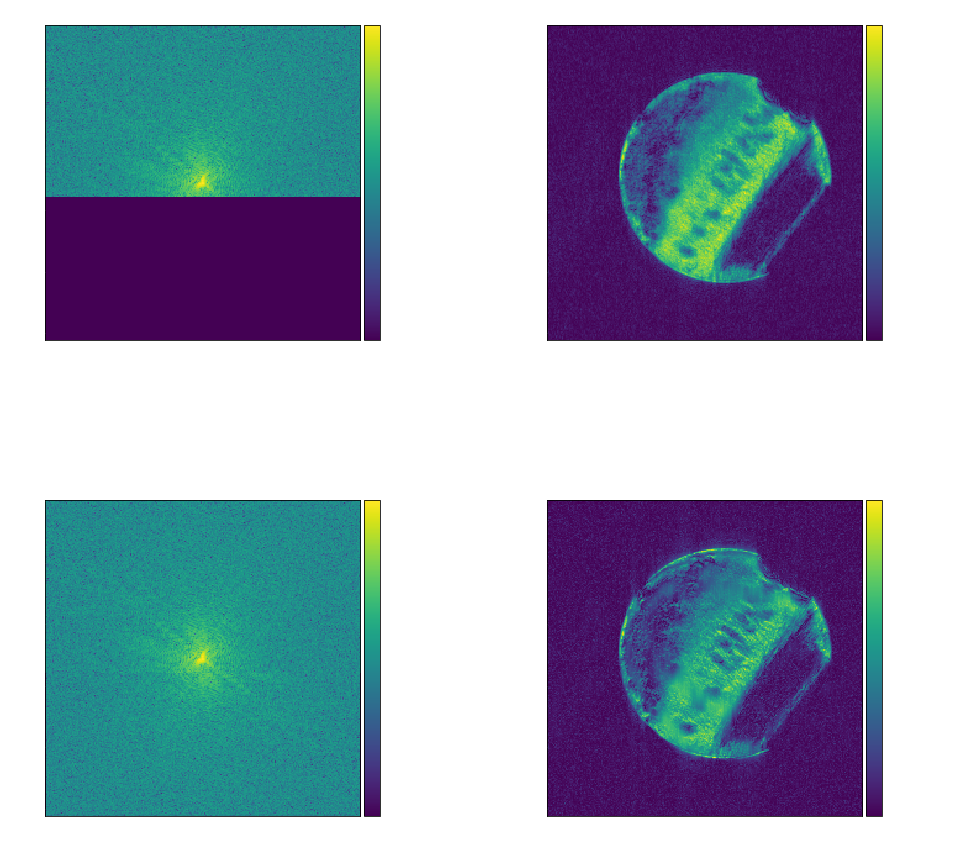

In [28]:
plot.comparison_k_plots(plots_6)

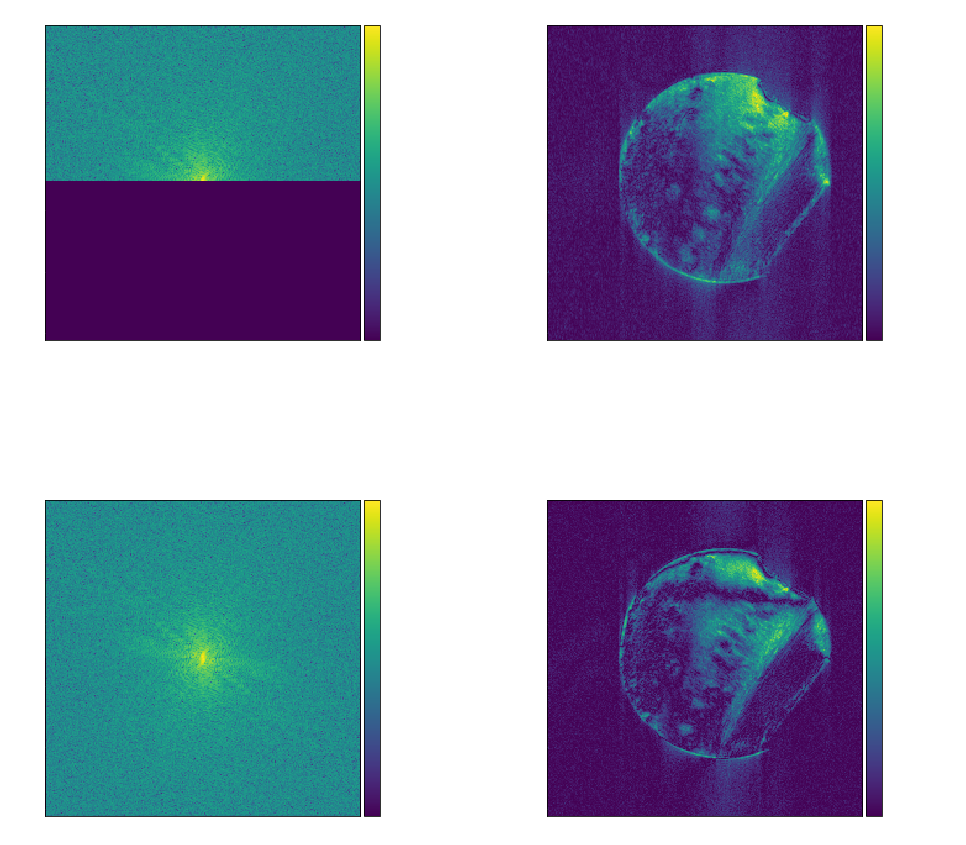

In [31]:
k_sp_50 = partial_fourier(k_sp,'up',50)
k_sp_conj_50 = conjugate_corrections(k_sp,50)
plots_7 = {
        '50% of K-space Only': k_sp_50,
        'Conjugate of remaining 50%': k_sp_conj_50
        #'Lower Half of K-space Only': lower,
        #'Conjugate of Lower Half of K-space': conj_lower
          }
plot.comparison_k_plots(plots_7)

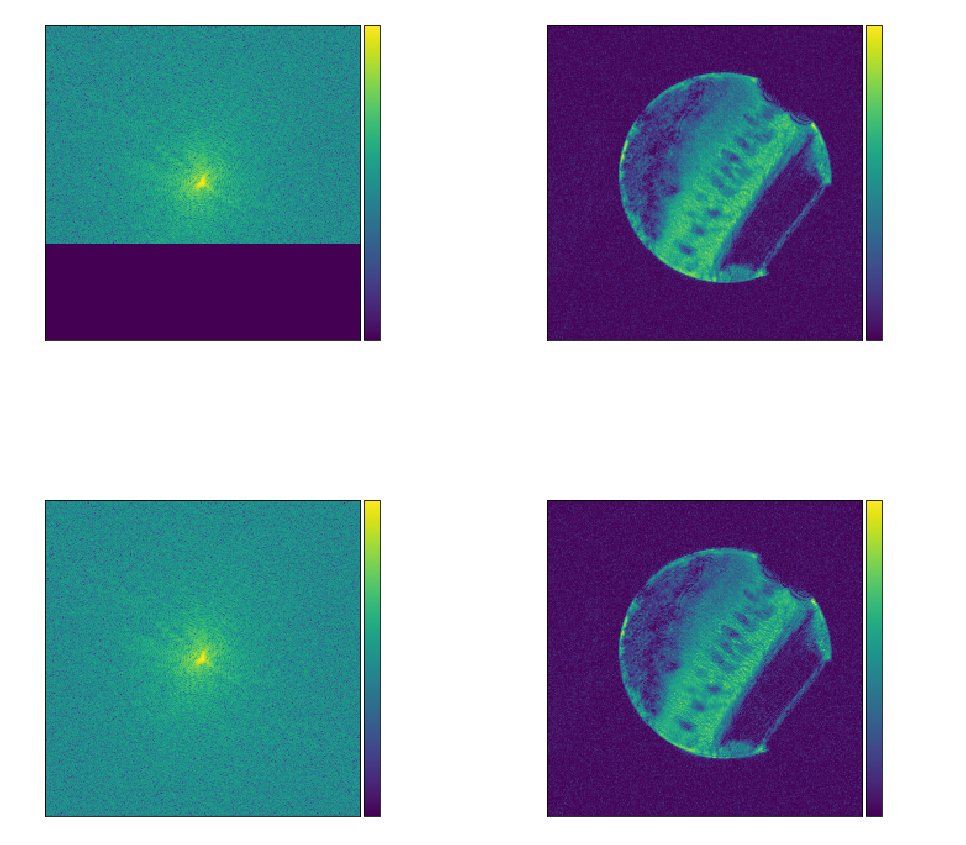

In [35]:
k_sp_70 = partial_fourier(k_sp,'up',70)
k_sp_conj_70 = conjugate_corrections(k_sp,70)
plots_8 = {
        '70% of K-space Only': k_sp_70,
        'Conjugate of remaining 30%': k_sp_conj_70
        #'Lower Half of K-space Only': lower,
        #'Conjugate of Lower Half of K-space': conj_lower
          }
plot.comparison_k_plots(plots_8)